In [2]:
# Load required libraries
library(DESeq2)

Warning message:
"package 'DESeq2' was built under R version 4.3.1"
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges

Warning message:

In [3]:
# Load gene expression data
count_data <- read.table("TCGA-BRCA.htseq_counts_gene_name.tsv", header = TRUE, row.names = 1)
head(count_data)

,TCGA.E2.A153.11A,TCGA.D8.A1Y3.01A,TCGA.EW.A3E8.01B,TCGA.AC.A3QQ.01B,TCGA.D8.A3Z6.01A,TCGA.AR.A1AS.01A,TCGA.BH.A1FB.11A,TCGA.E9.A228.01A,TCGA.GI.A2C8.11A,TCGA.E2.A105.01A,⋯,TCGA.B6.A0I6.01A,TCGA.A2.A25C.01A,TCGA.AC.A23H.11A,TCGA.A8.A07C.01A,TCGA.BH.A1F2.11A,TCGA.A7.A0D9.01A,TCGA.E2.A1L6.01A,TCGA.BH.A0BJ.11A,TCGA.E2.A15G.01A,TCGA.AR.A1AP.01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.321928,3.700440,6.491853,4.523562,5.857981,4.169925,5.523562,4.392317,2.321928,5.781360,⋯,3.906891,5.807355,4.906891,4.169925,5.209453,4.754888,6.022368,4.584963,5.247928,5.209453
A1CF,2.321928,0.000000,1.584963,6.189825,2.584963,0.000000,0.000000,4.392317,2.321928,2.321928,⋯,1.000000,4.087463,2.321928,4.459432,2.584963,3.000000,2.807355,3.169925,1.584963,0.000000
A2M,16.006041,14.433194,15.312954,13.529431,15.428393,13.338179,15.602670,14.653909,15.254032,14.375990,⋯,14.440350,15.804736,16.823716,15.155293,17.071693,14.882977,16.091745,16.293454,14.156636,14.800091
A2ML1,5.491853,6.409391,4.857981,6.228819,3.906891,4.700440,4.754888,4.087463,2.807355,4.392317,⋯,6.658211,4.321928,7.247928,8.238405,6.087463,6.870365,4.169925,6.000000,3.321928,3.000000
A3GALT2,1.584963,0.000000,1.584963,0.000000,2.321928,0.000000,2.321928,1.000000,1.584963,1.584963,⋯,4.523562,0.000000,1.000000,3.000000,3.000000,2.584963,1.584963,2.807355,2.321928,2.321928
A4GALT,9.876517,8.049849,10.649256,6.209453,11.076148,8.523562,8.879583,8.357552,9.766529,10.531381,⋯,11.371777,10.112440,9.871905,8.851749,10.450180,9.656425,11.179909,9.409391,10.226412,10.044394


In [4]:
dim(count_data)

[1] 19234   135

In [5]:
# Load phenotype data
pheno_data <- read.table("TCGA-BRCA.pheno.tsv", header = TRUE, row.names = 1)
head(pheno_data)

,type,tissue_source_site,disease_type
,<chr>,<chr>,<chr>
TCGA.BH.A1FR.11B,Normal,BH,Ductal and Lobular Neoplasms
TCGA.BH.A0BM.11A,Normal,BH,Ductal and Lobular Neoplasms
TCGA.D8.A1JH.01A,Tumor,D8,Ductal and Lobular Neoplasms
TCGA.BH.A0DL.11A,Normal,BH,Complex Epithelial Neoplasms
TCGA.E9.A1N4.11A,Normal,E9,Ductal and Lobular Neoplasms
TCGA.E2.A3DX.01A,Tumor,E2,Ductal and Lobular Neoplasms


In [6]:
dim(pheno_data)

[1] 122   3

As it mentioned in the problem statement that not all samples are present in both files. Let's find common samples present

In [7]:
common_samples <- intersect(colnames(count_data), rownames(pheno_data))

In [8]:
common_samples

[1] "TCGA.E2.A153.11A" "TCGA.D8.A1Y3.01A" "TCGA.EW.A3E8.01B"
  [4] "TCGA.AC.A3QQ.01B" "TCGA.D8.A3Z6.01A" "TCGA.BH.A1FB.11A"
  [7] "TCGA.E9.A228.01A" "TCGA.GI.A2C8.11A" "TCGA.E2.A105.01A"
 [10] "TCGA.BH.A0BQ.11A" "TCGA.E9.A1RC.11A" "TCGA.BH.A0BM.01A"
 [13] "TCGA.B6.A3ZX.01A" "TCGA.AC.A2FF.11A" "TCGA.A8.A09Q.01A"
 [16] "TCGA.BH.A0C3.11A" "TCGA.BH.A0DO.11A" "TCGA.OL.A5S0.01A"
 [19] "TCGA.A2.A3XV.01A" "TCGA.BH.A8FY.01A" "TCGA.BH.A1F8.11B"
 [22] "TCGA.BH.A0BM.11A" "TCGA.E2.A15M.11A" "TCGA.A7.A0D9.11A"
 [25] "TCGA.E9.A1R6.01A" "TCGA.B6.A0RG.01A" "TCGA.BH.A18K.11A"
 [28] "TCGA.BH.A1EN.11A" "TCGA.BH.A0C7.01B" "TCGA.EW.A1OY.01A"
 [31] "TCGA.A7.A3IZ.01A" "TCGA.BH.A18M.11A" "TCGA.AR.A24K.01A"
 [34] "TCGA.BH.A0BG.01A" "TCGA.BH.A1EW.11B" "TCGA.E2.A14X.01A"
 [37] "TCGA.E2.A1L7.11A" "TCGA.AC.A8OS.01A" "TCGA.A7.A13G.11A"
 [40] "TCGA.AR.A1AK.01A" "TCGA.BH.A0AU.11A" "TCGA.BH.A1F5.01A"
 [43] "TCGA.EW.A6SB.01A" "TCGA.D8.A145.01A" "TCGA.BH.A0HK.11A"
 [46] "TCGA.E2.A15I.11A" "TCGA.BH.A0B3.11B" "TCGA.B6.A0X4.01A"
 [49] "TCGA.E2.A14Q.01A" "TCGA.E2.A15K.11A" "TCGA.AC.A62Y.01A"
 [52] "TCGA.BH.A1FN.11A" "TCGA.E9.A1NG.11A" "TCGA.BH.A0DL.01A"
 [55] "TCGA.E9.A1N9.11A" "TCGA.AO.A125.01A" "TCGA.BH.A1FD.11B"
 [58] "TCGA.A7.A0CD.01A" "TCGA.E9.A1RI.11A" "TCGA.BH.A0C0.11A"
 [61] "TCGA.E2.A3DX.01A" "TCGA.BH.A0BA.11A" "TCGA.BH.A208.11A"
 [64] "TCGA.A8.A08L.01A" "TCGA.D8.A1JI.01A" "TCGA.BH.A0DZ.11A"
 [67] "TCGA.BH.A1EO.11A" "TCGA.E9.A1N4.11A" "TCGA.BH.A0W4.01A"
 [70] "TCGA.LQ.A4E4.01A" "TCGA.BH.A0DL.11A" "TCGA.BH.A1FE.11B"
 [73] "TCGA.AR.A0U2.01A" "TCGA.AN.A0FV.01A" "TCGA.E2.A1BC.11A"
 [76] "TCGA.AN.A0XW.01A" "TCGA.A7.A0CH.11A" "TCGA.BH.A18V.11A"
 [79] "TCGA.E9.A5FL.01A" "TCGA.D8.A1JH.01A" "TCGA.A8.A085.01A"
 [82] "TCGA.E9.A54Y.01A" "TCGA.BH.A1F6.11B" "TCGA.D8.A1JA.01A"
 [85] "TCGA.BH.A0BJ.01A" "TCGA.EW.A2FR.01A" "TCGA.BH.A1FG.11B"
 [88] "TCGA.AQ.A54N.01A" "TCGA.AQ.A0Y5.01A" "TCGA.AC.A6IX.01A"
 [91] "TCGA.E2.A1LH.11A" "TCGA.BH.A18P.11A" "TCGA.BH.A0DQ.11A"
 [94] "TCGA.D8.A73U.01A" "TCGA.A7.A4SF.01A" "TCGA.MS.A51U.01A"
 [97] "TCGA.BH.A0BR.01A" "TCGA.A2.A3XZ.01A" "TCGA.BH.A0DQ.01A"
[100] "TCGA.A2.A1G6.01A" "TCGA.A2.A04T.01A" "TCGA.C8.A12P.01A"
[103] "TCGA.B6.A0RU.01A" "TCGA.A2.A1FV.01A" "TCGA.A8.A09K.01A"
[106] "TCGA.D8.A1XG.01A" "TCGA.EW.A1IX.01A" "TCGA.BH.A203.11A"
[109] "TCGA.E9.A1RD.11A" "TCGA.BH.A1FR.11B" "TCGA.D8.A1JF.01A"
[112] "TCGA.BH.A1FD.01A" "TCGA.E9.A1N6.11A" "TCGA.B6.A0I6.01A"
[115] "TCGA.A2.A25C.01A" "TCGA.AC.A23H.11A" "TCGA.A8.A07C.01A"
[118] "TCGA.BH.A1F2.11A" "TCGA.A7.A0D9.01A" "TCGA.E2.A1L6.01A"
[121] "TCGA.BH.A0BJ.11A" "TCGA.E2.A15G.01A"

In [9]:
length(common_samples)

[1] 122

In [10]:
count_data <- count_data[, common_samples]
head(count_data)
dim(count_data)

,TCGA.E2.A153.11A,TCGA.D8.A1Y3.01A,TCGA.EW.A3E8.01B,TCGA.AC.A3QQ.01B,TCGA.D8.A3Z6.01A,TCGA.BH.A1FB.11A,TCGA.E9.A228.01A,TCGA.GI.A2C8.11A,TCGA.E2.A105.01A,TCGA.BH.A0BQ.11A,⋯,TCGA.E9.A1N6.11A,TCGA.B6.A0I6.01A,TCGA.A2.A25C.01A,TCGA.AC.A23H.11A,TCGA.A8.A07C.01A,TCGA.BH.A1F2.11A,TCGA.A7.A0D9.01A,TCGA.E2.A1L6.01A,TCGA.BH.A0BJ.11A,TCGA.E2.A15G.01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.321928,3.700440,6.491853,4.523562,5.857981,5.523562,4.392317,2.321928,5.781360,4.700440,⋯,4.00000,3.906891,5.807355,4.906891,4.169925,5.209453,4.754888,6.022368,4.584963,5.247928
A1CF,2.321928,0.000000,1.584963,6.189825,2.584963,0.000000,4.392317,2.321928,2.321928,1.584963,⋯,1.00000,1.000000,4.087463,2.321928,4.459432,2.584963,3.000000,2.807355,3.169925,1.584963
A2M,16.006041,14.433194,15.312954,13.529431,15.428393,15.602670,14.653909,15.254032,14.375990,16.594922,⋯,15.93894,14.440350,15.804736,16.823716,15.155293,17.071693,14.882977,16.091745,16.293454,14.156636
A2ML1,5.491853,6.409391,4.857981,6.228819,3.906891,4.754888,4.087463,2.807355,4.392317,7.467606,⋯,5.83289,6.658211,4.321928,7.247928,8.238405,6.087463,6.870365,4.169925,6.000000,3.321928
A3GALT2,1.584963,0.000000,1.584963,0.000000,2.321928,2.321928,1.000000,1.584963,1.584963,2.000000,⋯,3.00000,4.523562,0.000000,1.000000,3.000000,3.000000,2.584963,1.584963,2.807355,2.321928
A4GALT,9.876517,8.049849,10.649256,6.209453,11.076148,8.879583,8.357552,9.766529,10.531381,9.280771,⋯,10.02098,11.371777,10.112440,9.871905,8.851749,10.450180,9.656425,11.179909,9.409391,10.226412


[1] 19234   122

In [11]:
pheno_data <- pheno_data[common_samples, ]
head(pheno_data)
dim(pheno_data)

,type,tissue_source_site,disease_type
,<chr>,<chr>,<chr>
TCGA.E2.A153.11A,Normal,E2,Ductal and Lobular Neoplasms
TCGA.D8.A1Y3.01A,Tumor,D8,Ductal and Lobular Neoplasms
TCGA.EW.A3E8.01B,Tumor,EW,Ductal and Lobular Neoplasms
TCGA.AC.A3QQ.01B,Tumor,AC,Ductal and Lobular Neoplasms
TCGA.D8.A3Z6.01A,Tumor,D8,Ductal and Lobular Neoplasms
TCGA.BH.A1FB.11A,Normal,BH,Ductal and Lobular Neoplasms


[1] 122   3

Successfully we have processed the data maintaing same number of sample in both datasets. 

DESeq2 will be taking only raw counts as input let's convert the log transformed data to raw counts

In [48]:
max(count_data)

[1] 21.63065

In [49]:
min(count_data)

[1] 0

In [12]:
# Convert log-transformed data to raw counts
raw_count_data <- round(2^(count_data) - 1)

In [14]:
head(raw_count_data)

,TCGA.E2.A153.11A,TCGA.D8.A1Y3.01A,TCGA.EW.A3E8.01B,TCGA.AC.A3QQ.01B,TCGA.D8.A3Z6.01A,TCGA.BH.A1FB.11A,TCGA.E9.A228.01A,TCGA.GI.A2C8.11A,TCGA.E2.A105.01A,TCGA.BH.A0BQ.11A,⋯,TCGA.E9.A1N6.11A,TCGA.B6.A0I6.01A,TCGA.A2.A25C.01A,TCGA.AC.A23H.11A,TCGA.A8.A07C.01A,TCGA.BH.A1F2.11A,TCGA.A7.A0D9.01A,TCGA.E2.A1L6.01A,TCGA.BH.A0BJ.11A,TCGA.E2.A15G.01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,19,12,89,22,57,45,20,4,54,25,⋯,15,14,55,29,17,36,26,64,23,37
A1CF,4,0,2,72,5,0,20,4,4,2,⋯,1,1,16,4,21,5,7,6,8,2
A2M,65810,22121,40705,11823,44096,49758,25778,39076,21261,98984,⋯,62819,22231,57239,115995,36491,137749,30214,69838,80318,18262
A2ML1,44,84,28,74,14,26,16,6,20,176,⋯,56,100,19,151,301,67,116,17,63,9
A3GALT2,2,0,2,0,4,4,1,2,2,3,⋯,7,22,0,1,7,7,5,2,6,4
A4GALT,939,264,1605,73,2158,470,327,870,1479,621,⋯,1038,2649,1106,936,461,1398,806,2319,679,1197


Before going ahead with further analysis, let's confirm whether samples in raw count and pheno data are in same order 

In [15]:
all(colnames(raw_count_data) %in% rownames(pheno_data))

[1] TRUE

In [16]:
all(colnames(raw_count_data) == rownames(pheno_data))

[1] TRUE

In [46]:
max(raw_count_data)
min(raw_count_data)

[1] 3246935

[1] 0

In [47]:
head(raw_count_data)

,TCGA.E2.A153.11A,TCGA.D8.A1Y3.01A,TCGA.EW.A3E8.01B,TCGA.AC.A3QQ.01B,TCGA.D8.A3Z6.01A,TCGA.BH.A1FB.11A,TCGA.E9.A228.01A,TCGA.GI.A2C8.11A,TCGA.E2.A105.01A,TCGA.BH.A0BQ.11A,⋯,TCGA.E9.A1N6.11A,TCGA.B6.A0I6.01A,TCGA.A2.A25C.01A,TCGA.AC.A23H.11A,TCGA.A8.A07C.01A,TCGA.BH.A1F2.11A,TCGA.A7.A0D9.01A,TCGA.E2.A1L6.01A,TCGA.BH.A0BJ.11A,TCGA.E2.A15G.01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,19,12,89,22,57,45,20,4,54,25,⋯,15,14,55,29,17,36,26,64,23,37
A1CF,4,0,2,72,5,0,20,4,4,2,⋯,1,1,16,4,21,5,7,6,8,2
A2M,65810,22121,40705,11823,44096,49758,25778,39076,21261,98984,⋯,62819,22231,57239,115995,36491,137749,30214,69838,80318,18262
A2ML1,44,84,28,74,14,26,16,6,20,176,⋯,56,100,19,151,301,67,116,17,63,9
A3GALT2,2,0,2,0,4,4,1,2,2,3,⋯,7,22,0,1,7,7,5,2,6,4
A4GALT,939,264,1605,73,2158,470,327,870,1479,621,⋯,1038,2649,1106,936,461,1398,806,2319,679,1197


Let's see if there any scope for further preprocessing.  

pre-filtering: removing rows with low gene counts

In [17]:
# Calculate total counts per gene
total_counts_per_gene <- rowSums(raw_count_data)
head(total_counts_per_gene)

A1BG    A1CF     A2M   A2ML1 A3GALT2  A4GALT 
   4194     688 7336177  109075     380  127234

In [22]:
max(total_counts_per_gene)

[1] 76894110

In [23]:
min(total_counts_per_gene)

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


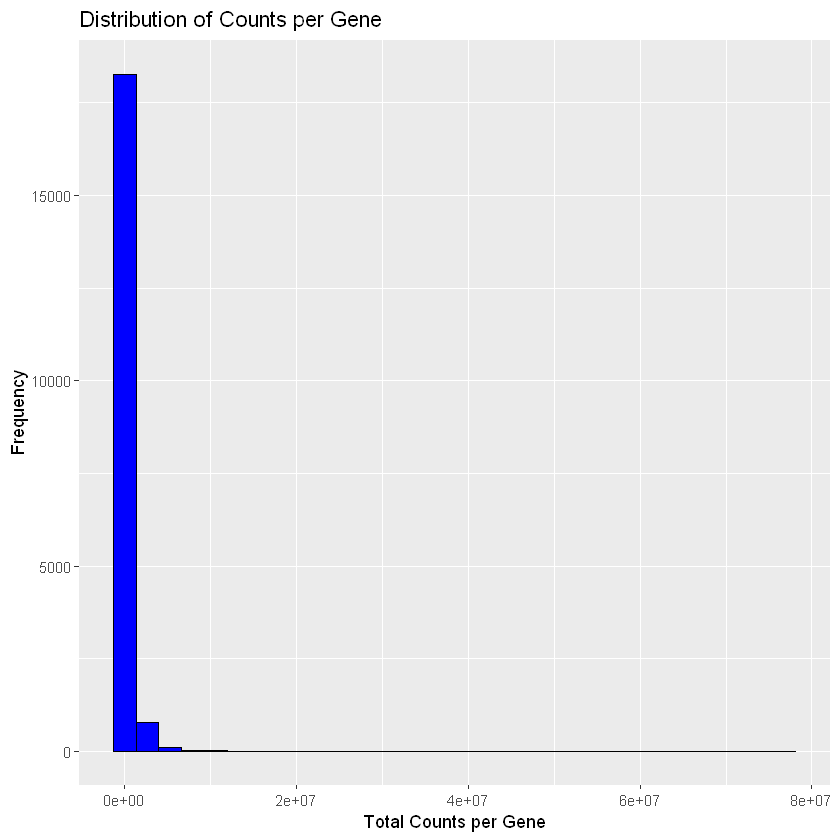

In [24]:
library(ggplot2)
# Create a histogram of total counts per gene
ggplot(data = data.frame(total_counts = total_counts_per_gene), aes(x = total_counts)) +
  geom_histogram( fill = "blue", color = "black") +
  labs(title = "Distribution of Counts per Gene",
       x = "Total Counts per Gene",
       y = "Frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 17863 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


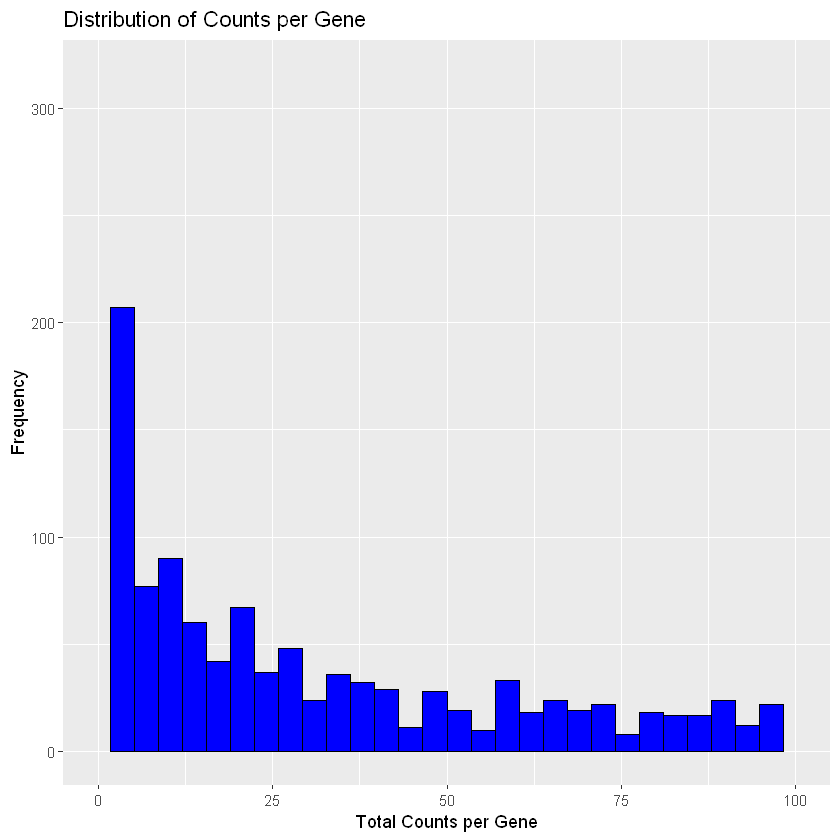

In [45]:
ggplot(data = data.frame(total_counts = total_counts_per_gene), aes(x = total_counts)) +
  geom_histogram( fill = "blue", color = "black") +
  xlim(0, 100)+
  labs(title = "Distribution of Counts per Gene",
       x = "Total Counts per Gene",
       y = "Frequency")

From the above graph it is understood that there is no scope for preprocessing

Let's construct DESeqDataset Objet

In [25]:
# Create DESeq2 data object
dds <- DESeqDataSetFromMatrix(countData = raw_count_data,
                              colData = pheno_data,
                              design = ~ type + disease_type)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



set the factor level

In [50]:
dds$type <- relevel(dds$type, ref = "Tumor")

Quality control
vst normalization for PCA

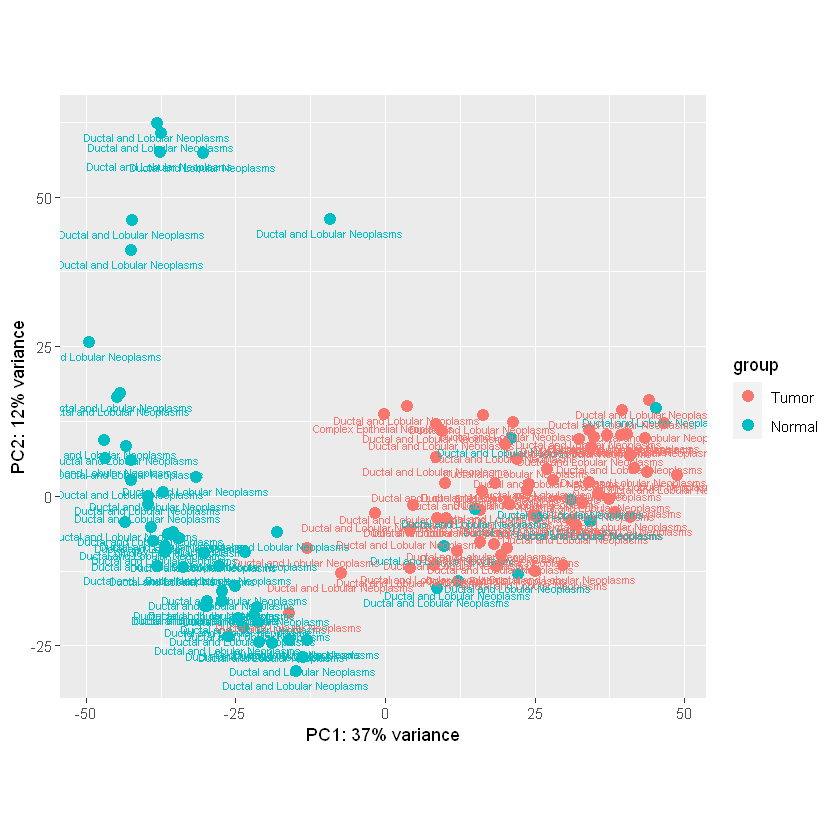

In [51]:
vsd = vst(dds)
pca_plot = DESeq2::plotPCA(vsd,intgroup = 'type')
pca_plot + geom_text(size=2.4,aes(label=pheno_data$disease_type),vjust=2)

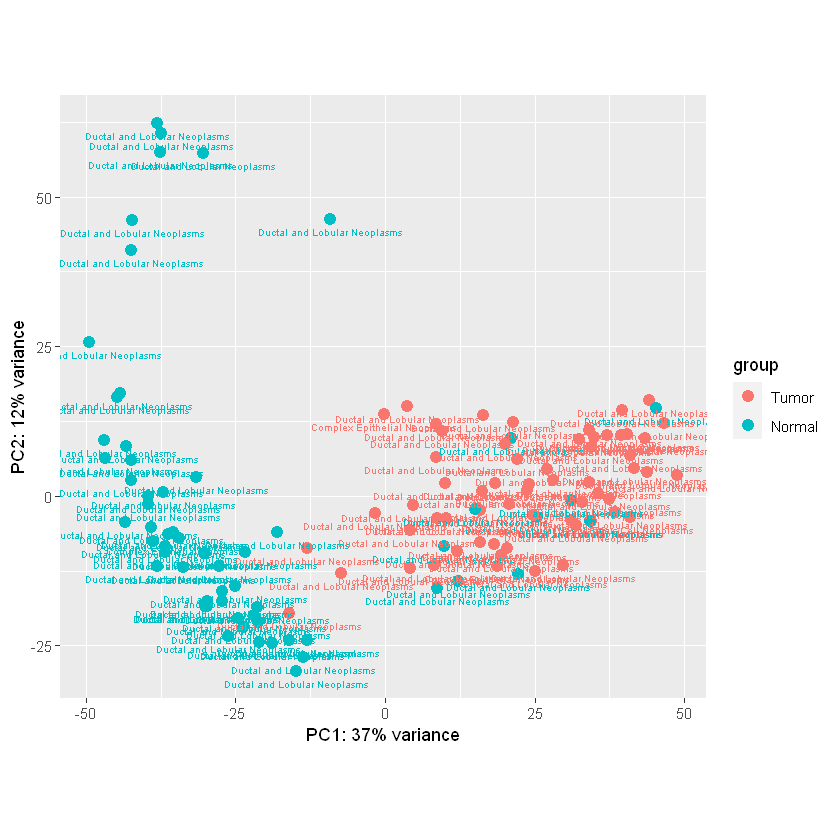

In [53]:
pca_plot + geom_text(size=2.2,aes(label=pheno_data$disease_type),vjust=2)

In [26]:
# Run DESeq2 analysis
dds <- DESeq(dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  fo

We have successfully ran DESeq, now let's explore the results 

In [27]:
# Get differential expression results
res <- results(dds, contrast = c('type','Tumor','Normal'))

In [28]:
res

log2 fold change (MLE): type Tumor vs Normal 
Wald test p-value: type Tumor vs Normal 
DataFrame with 19234 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat      pvalue        padj
          <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
A1BG       33.84831       0.592463  0.155561  3.808550 1.39784e-04 3.98120e-04
A1CF        4.40533      -0.459399  0.331153 -1.387271 1.65359e-01 2.33805e-01
A2M     57660.61488      -1.313815  0.132331 -9.928217 3.13816e-23 1.74287e-21
A2ML1     423.33334       2.845920  0.372124  7.647782 2.04475e-14 3.15316e-13
A3GALT2     2.99330      -0.233519  0.281631 -0.829168 4.07009e-01 5.06568e-01
...             ...            ...       ...       ...         ...         ...
ZYG11A      262.937       1.097983 0.2289215   4.79633 1.61597e-06 6.62075e-06
ZYG11B     3519.758      -0.650269 0.1300773  -4.99910 5.75994e-07 2.56951e-06
ZYX       11685.500      -0.329376 0.1096115  -3.00494 2.65636e-03 5.74592e-03
ZZEF

In [29]:
summary(res)


out of 18994 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 7393, 39%
LFC < 0 (down)     : 4583, 24%
outliers [1]       : 0, 0%
low counts [2]     : 1, 0.0053%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [30]:
sig_genes = as.data.frame(res[which(res$padj < 0.05),])
head(sig_genes)
dim(sig_genes)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,33.848307,0.5924632,0.15556138,3.808550,1.397843e-04,3.981201e-04
A2M,57660.614880,-1.3138149,0.13233140,-9.928217,3.138157e-23,1.742870e-21
A2ML1,423.333343,2.8459197,0.37212353,7.647782,2.044754e-14,3.153156e-13
A4GNT,5.939878,-1.2812227,0.33100755,-3.870675,1.085344e-04,3.150699e-04
AAAS,2267.886646,0.2661434,0.07958072,3.344320,8.248457e-04,1.998612e-03
AADAC,139.489918,-4.4764218,0.48599649,-9.210811,3.236699e-20,1.153431e-18


[1] 11045     6

In [31]:
# Filter significantly differentially expressed genes
alpha_cutoff <- 0.05
significant_genes <- subset(res, padj < alpha_cutoff & abs(log2FoldChange) > 1)
dim(significant_genes)
head(significant_genes)

[1] 3935    6

log2 fold change (MLE): type Tumor vs Normal 
Wald test p-value: type Tumor vs Normal 
DataFrame with 6 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat      pvalue        padj
          <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
A2M     57660.61488       -1.31381  0.132331  -9.92822 3.13816e-23 1.74287e-21
A2ML1     423.33334        2.84592  0.372124   7.64778 2.04475e-14 3.15316e-13
A4GNT       5.93988       -1.28122  0.331008  -3.87068 1.08534e-04 3.15070e-04
AADAC     139.48992       -4.47642  0.485996  -9.21081 3.23670e-20 1.15343e-18
AADACL2     4.89657       -2.71860  0.466610  -5.82629 5.66722e-09 3.60011e-08
AADACL3     3.07037       -3.56017  0.644961  -5.51998 3.39034e-08 1.88403e-07

On filtering the genes with alpha_cutoff of 0.05 and log2FoldChange > 1
we have 3935 genes

Let's find upregulated and downregulated genes

In [32]:
upregulated = sig_genes[which(sig_genes$log2FoldChange > 0.6), ]
downregulated = sig_genes[which(sig_genes$log2FoldChange < -0.6), ]

In [33]:
dim(upregulated)

[1] 3785    6

In [34]:
dim(downregulated)

[1] 2924    6

Let's save DESeq expressed genes

In [36]:
significant_genes_df = as.data.frame(significant_genes)

In [37]:
significant_genes_df$GeneName <- row.names(significant_genes)
head(significant_genes_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A2M,57660.614880,-1.313815,0.1323314,-9.928217,3.138157e-23,1.742870e-21,A2M
A2ML1,423.333343,2.845920,0.3721235,7.647782,2.044754e-14,3.153156e-13,A2ML1
A4GNT,5.939878,-1.281223,0.3310076,-3.870675,1.085344e-04,3.150699e-04,A4GNT
AADAC,139.489918,-4.476422,0.4859965,-9.210811,3.236699e-20,1.153431e-18,AADAC
AADACL2,4.896570,-2.718604,0.4666096,-5.826293,5.667221e-09,3.600107e-08,AADACL2
AADACL3,3.070368,-3.560171,0.6449605,-5.519982,3.390335e-08,1.884027e-07,AADACL3


In [38]:
rownames(significant_genes_df) <- NULL
head(significant_genes_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,57660.614880,-1.313815,0.1323314,-9.928217,3.138157e-23,1.742870e-21,A2M
2,423.333343,2.845920,0.3721235,7.647782,2.044754e-14,3.153156e-13,A2ML1
3,5.939878,-1.281223,0.3310076,-3.870675,1.085344e-04,3.150699e-04,A4GNT
4,139.489918,-4.476422,0.4859965,-9.210811,3.236699e-20,1.153431e-18,AADAC
5,4.896570,-2.718604,0.4666096,-5.826293,5.667221e-09,3.600107e-08,AADACL2
6,3.070368,-3.560171,0.6449605,-5.519982,3.390335e-08,1.884027e-07,AADACL3


In [41]:
head(significant_genes_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,57660.614880,-1.313815,0.1323314,-9.928217,3.138157e-23,1.742870e-21,A2M
2,423.333343,2.845920,0.3721235,7.647782,2.044754e-14,3.153156e-13,A2ML1
3,5.939878,-1.281223,0.3310076,-3.870675,1.085344e-04,3.150699e-04,A4GNT
4,139.489918,-4.476422,0.4859965,-9.210811,3.236699e-20,1.153431e-18,AADAC
5,4.896570,-2.718604,0.4666096,-5.826293,5.667221e-09,3.600107e-08,AADACL2
6,3.070368,-3.560171,0.6449605,-5.519982,3.390335e-08,1.884027e-07,AADACL3


In [42]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [45]:
significant_genes_df %>%
  select(GeneName, log2FoldChange, pvalue, padj) %>%
  write.csv(file = "diff_result_Kiran_Franklin.csv", row.names = FALSE)

In [51]:
library(EnhancedVolcano)
library(pheatmap)

Loading required package: ggrepel

Warning message:
"package 'ggrepel' was built under R version 4.3.1"
Warning message:
"package 'pheatmap' was built under R version 4.3.1"


In [52]:
vplot= EnhancedVolcano(significant_genes_df,
                       lab = significant_genes_df$GeneName,
                       x = 'log2FoldChange',
                       y = 'padj',
                       pCutoff = 0.05,
                       FCcutoff = 1,                
                       title = '',
                       subtitle = "Normal Vs Tumor",                     ##
                       
                       pointSize = 3.0,
                       colAlpha = 0.7,
                       legendLabels=c('Not sig.','Log2FC','padj',
                                      'padj & Log2FC'),
                       #drawConnectors = TRUE,
                       labSize = 4.0)

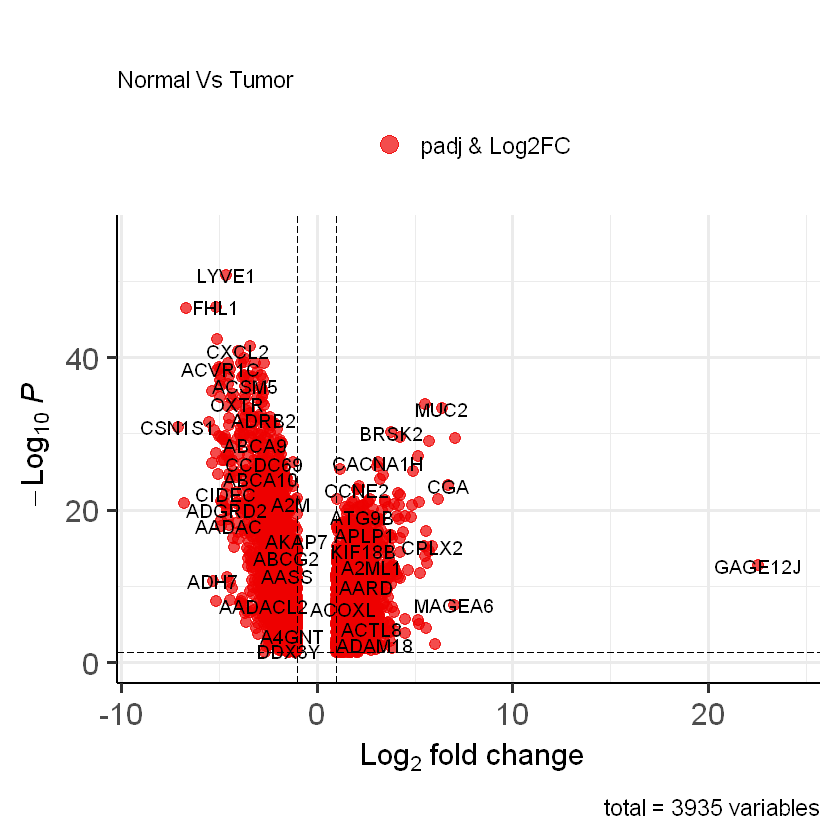

In [53]:
vplot

In [55]:
##heatmap of top 50 genes

##selecting top 50 degs
deg_sort = significant_genes_df[order(abs(significant_genes_df$log2FoldChange), decreasing = T),]
top_50= deg_sort[1:50,]

In [56]:
####converting counts to normalized counts and applying scaling
mat= counts(dds, normalized=T)[top_50$GeneName,]
mat.z=t(apply(mat,1,scale))
colnames(mat.z)= colnames(mat)

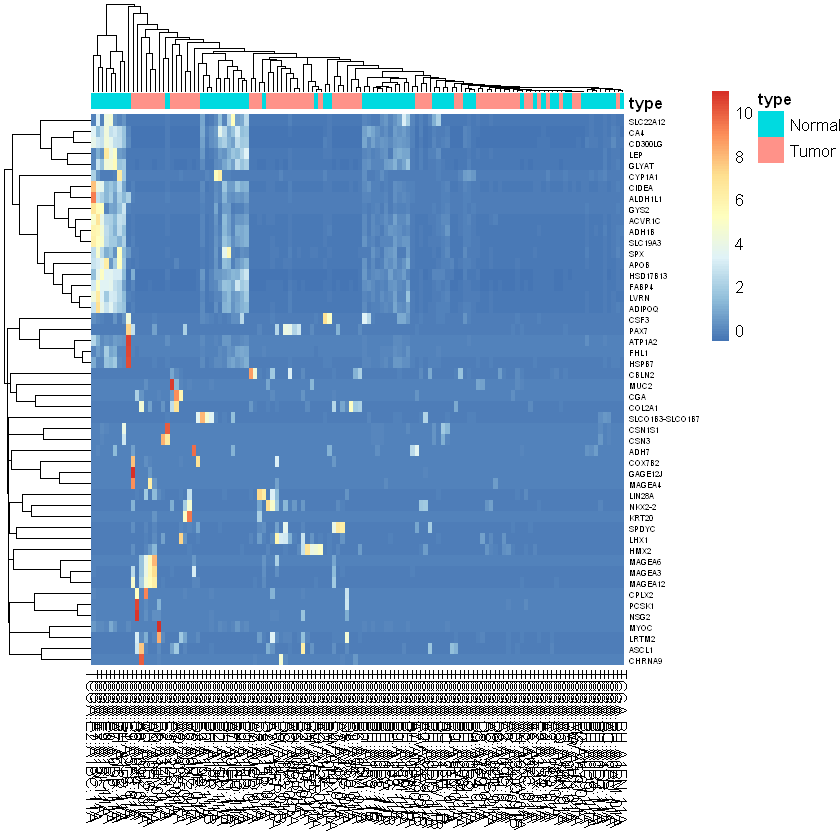

In [59]:
annot_col= as.data.frame(pheno_data[,1])
rownames(annot_col)= rownames(pheno_data)
colnames(annot_col)= "type"
pheatmap(mat.z, cluster_cols = T, fontsize_row = 5, annotation_col = annot_col) -> hplot


In [60]:
library(pathview)
library(gage)
library(gageData)



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################





In [61]:
data(kegg.sets.hs)
data(sigmet.idx.hs)
kegg.sets.hs = kegg.sets.hs[sigmet.idx.hs]
head(kegg.sets.hs, 3)

$`hsa00232 Caffeine metabolism`
[1] "10"   "1544" "1548" "1549" "1553" "7498" "9"   

$`hsa00983 Drug metabolism - other enzymes`
 [1] "10"     "1066"   "10720"  "10941"  "151531" "1548"   "1549"   "1551"  
 [9] "1553"   "1576"   "1577"   "1806"   "1807"   "1890"   "221223" "2990"  
[17] "3251"   "3614"   "3615"   "3704"   "51733"  "54490"  "54575"  "54576" 
[25] "54577"  "54578"  "54579"  "54600"  "54657"  "54658"  "54659"  "54963" 
[33] "574537" "64816"  "7083"   "7084"   "7172"   "7363"   "7364"   "7365"  
[41] "7366"   "7367"   "7371"   "7372"   "7378"   "7498"   "79799"  "83549" 
[49] "8824"   "8833"   "9"      "978"   

$`hsa00230 Purine metabolism`
  [1] "100"    "10201"  "10606"  "10621"  "10622"  "10623"  "107"    "10714" 
  [9] "108"    "10846"  "109"    "111"    "11128"  "11164"  "112"    "113"   
 [17] "114"    "115"    "122481" "122622" "124583" "132"    "158"    "159"   
 [25] "1633"   "171568" "1716"   "196883" "203"    "204"    "205"    "221823"
 [33] "2272"   "22978"  "23649"  "246721" "25885"  "2618"   "26289"  "270"   
 [41] "271"    "27115"  "272"    "2766"   "2977"   "2982"   "2983"   "2984"  
 [49] "2986"   "2987"   "29922"  "3000"   "30833"  "30834"  "318"    "3251"  
 [57] "353"    "3614"   "3615"   "3704"   "377841" "471"    "4830"   "4831"  
 [65] "4832"   "4833"   "4860"   "4881"   "4882"   "4907"   "50484"  "50940" 
 [73] "51082"  "51251"  "51292"  "5136"   "5137"   "5138"   "5139"   "5140"  
 [81] "5141"   "5142"   "5143"   "5144"   "5145"   "5146"   "5147"   "5148"  
 [89] "5149"   "5150"   "5151"   "5152"   "5153"   "5158"   "5167"   "5169"  
 [97] "51728"  "5198"   "5236"   "5313"   "5315"   "53343"  "54107"  "5422"  
[105] "5424"   "5425"   "5426"   "5427"   "5430"   "5431"   "5432"   "5433"  
[113] "5434"   "5435"   "5436"   "5437"   "5438"   "5439"   "5440"   "5441"  
[121] "5471"   "548644" "55276"  "5557"   "5558"   "55703"  "55811"  "55821" 
[129] "5631"   "5634"   "56655"  "56953"  "56985"  "57804"  "58497"  "6240"  
[137] "6241"   "64425"  "646625" "654364" "661"    "7498"   "8382"   "84172" 
[145] "84265"  "84284"  "84618"  "8622"   "8654"   "87178"  "8833"   "9060"  
[153] "9061"   "93034"  "953"    "9533"   "954"    "955"    "956"    "957"   
[161] "9583"   "9615"

Let's Convert GENE symbol to Enteriz ID

In [66]:
library(org.Hs.eg.db)
library(AnnotationDbi)

Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.3.1"

Attaching package: 'AnnotationDbi'


The following object is masked from 'package:dplyr':

    select




In [69]:
significant_genes_df$ENTREZID <- mapIds(org.Hs.eg.db, keys = significant_genes_df$GeneName,
       column = "ENTREZID", keytype = "SYMBOL")
head(significant_genes_df)

'select()' returned 1:many mapping between keys and columns



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName,ENTREZID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,57660.614880,-1.313815,0.1323314,-9.928217,3.138157e-23,1.742870e-21,A2M,2
2,423.333343,2.845920,0.3721235,7.647782,2.044754e-14,3.153156e-13,A2ML1,144568
3,5.939878,-1.281223,0.3310076,-3.870675,1.085344e-04,3.150699e-04,A4GNT,51146
4,139.489918,-4.476422,0.4859965,-9.210811,3.236699e-20,1.153431e-18,AADAC,13
5,4.896570,-2.718604,0.4666096,-5.826293,5.667221e-09,3.600107e-08,AADACL2,344752
6,3.070368,-3.560171,0.6449605,-5.519982,3.390335e-08,1.884027e-07,AADACL3,126767


Now Let's generate vector foldchanges with Enteriz IDs

In [70]:
foldchanges = significant_genes_df$log2FoldChange
names(foldchanges) = significant_genes_df$ENTREZID
head(foldchanges)

2    144568     51146        13    344752    126767 
-1.313815  2.845920 -1.281223 -4.476422 -2.718604 -3.560171

In [71]:
# Get the results
keggres = gage(foldchanges, gsets=kegg.sets.hs, same.dir=TRUE)

In [72]:
lapply(keggres, head)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa04110 Cell cycle,0.0001075366,3.968970,0.0001075366,0.00828032,36,0.0001075366
hsa04114 Oocyte meiosis,0.0068629161,2.551006,0.0068629161,0.26422227,27,0.0068629161
hsa04742 Taste transduction,0.0649604964,1.564138,0.0649604964,0.99880629,14,0.0649604964
hsa04115 p53 signaling pathway,0.0658055697,1.558775,0.0658055697,0.99880629,14,0.0658055697
hsa00240 Pyrimidine metabolism,0.0858265926,1.412537,0.0858265926,0.99880629,15,0.0858265926
hsa04914 Progesterone-mediated oocyte maturation,0.1568492155,1.019332,0.1568492155,0.99880629,23,0.1568492155
,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa00982 Drug metabolism - cytochrome P450,0.001193707,-3.200382,0.001193707,0.02786329,26,0.001193707
hsa02010 ABC transporters,0.001257425,-3.380610,0.001257425,0.02786329,15,0.001257425
hsa04920 Adipocytokine signaling pathway,0.001294707,-3.251930,0.001294707,0.02786329,18,0.001294707


In [73]:
# Get the pathways
keggrespathways = data.frame(id=rownames(keggres$greater), keggres$greater) %>% 
  tbl_df() %>% 
  filter(row_number()<=5) %>% 
  .$id %>% 
  as.character()
keggrespathways

Warning message:
"`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead."


[1] "hsa04110 Cell cycle"            "hsa04114 Oocyte meiosis"       
[3] "hsa04742 Taste transduction"    "hsa04115 p53 signaling pathway"
[5] "hsa00240 Pyrimidine metabolism"

In [78]:
write.csv( keggres, "pathway_result_Kiran_Franklin.csv")

In [74]:
# Get the IDs.
keggresids = substr(keggrespathways, start=1, stop=8)
keggresids

[1] "hsa04110" "hsa04114" "hsa04742" "hsa04115" "hsa00240"

In [75]:
# Define plotting function for applying later
plot_pathway = function(pid) pathview(gene.data=foldchanges, pathway.id=pid, species="hsa", new.signature=FALSE)

# plot multiple pathways (plots saved to disk and returns a throwaway list object)
tmp = sapply(keggresids, function(pid) pathview(gene.data=foldchanges, pathway.id=pid, species="hsa"))

Info: Downloading xml files for hsa04110, 1/1 pathways..

Info: Downloading png files for hsa04110, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory f:/kiran/ml model on agric/diff_exp

Info: Writing image file hsa04110.pathview.png

Info: Downloading xml files for hsa04114, 1/1 pathways..

Info: Downloading png files for hsa04114, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory f:/kiran/ml model on agric/diff_exp

Info: Writing image file hsa04114.pathview.png

Info: Downloading xml files for hsa04742, 1/1 pathways..

Info: Downloading png files for hsa04742, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory f:/kiran/ml model on agric/diff_exp

Info: Writing image file hsa04742.pathview.png

Info: some node width is different from others, and hence adjusted!

Info: Downloading xml files for hsa04115, 1/1 pathways..

Info: Downloadi